In [1]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
      try:
        tf.config.experimental.set_virtual_device_configuration(gpus[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2024)])
      except RuntimeError as e:
        print(e)

In [1]:
import pandas as pd
import matplotlib.pyplot as plot
import numpy as np
import seaborn as sns

In [2]:
x_train=pd.read_csv('X_train.csv')

In [3]:
x_train

,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
0,0_0,0,0,-0.75853,-0.63435,-0.104880,-0.105970,0.107650,0.017561,0.000767,-0.74857,2.1030,-9.7532
1,0_1,0,1,-0.75853,-0.63434,-0.104900,-0.106000,0.067851,0.029939,0.003385,0.33995,1.5064,-9.4128
2,0_2,0,2,-0.75853,-0.63435,-0.104920,-0.105970,0.007275,0.028934,-0.005978,-0.26429,1.5922,-8.7267
3,0_3,0,3,-0.75852,-0.63436,-0.104950,-0.105970,-0.013053,0.019448,-0.008974,0.42684,1.0993,-10.0960
4,0_4,0,4,-0.75852,-0.63435,-0.104950,-0.105960,0.005135,0.007652,0.005245,-0.50969,1.4689,-10.4410
...,...,...,...,...,...,...,...,...,...,...,...,...,...
487675,3809_123,3809,123,0.62871,-0.76878,-0.084391,0.081093,0.003167,0.093760,-0.142740,3.27180,2.0115,-9.0063
487676,3809_124,3809,124,0.62884,-0.76868,-0.084365,0.081099,0.014994,0.032637,-0.132380,4.42750,3.0696,-8.1257
487677,3809_125,3809,125,0.62891,-0.76861,-0.084345,0.081178,-0.031184,-0.003961,-0.138940,2.70480,4.2622,-8.1443
487678,3809_126,3809,126,0.62903,-0.76850,-0.084414,0.081231,-0.069153,0.013229,-0.130210,2.54100,4.7130,-9.4435


In [4]:
y_train=pd.read_csv('y_train.csv')

In [5]:
y_train

,series_id,group_id,surface
0,0,13,fine_concrete
1,1,31,concrete
2,2,20,concrete
3,3,31,concrete
4,4,22,soft_tiles
...,...,...,...
3805,3805,55,tiled
3806,3806,67,wood
3807,3807,48,fine_concrete
3808,3808,54,tiled


In [6]:
x_test=pd.read_csv('X_test_kaggle.csv')

# EDA

###### Choosing the performance metric for the target variable,surface

For the target variable i.e., surface accuracy,precision seems to be the correct peformance metrics since what we need is how accurately/correctly the surface was predicted by the model.
Since at the end we just want to predict which surface the robot was on so accuracy,precision metric will tell model perofrmance properly.

#### 1.The below bar plot depits the count of each surface type.

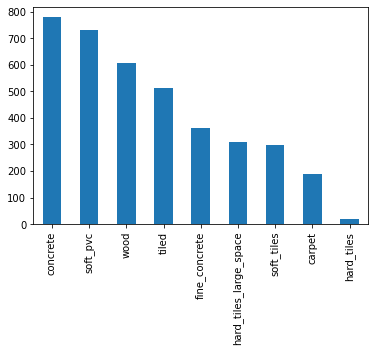

In [7]:
pd.value_counts(y_train['surface']).plot.bar()

one of the class label has comparatively very low count than other labels. i.e. hard_tiles

we need this because when we will split the data into train-test then we need to be caeful that the entire hardtiles shouldnt come under one set.

#### 2.Plotting barplot of each of the columns of the dataset.

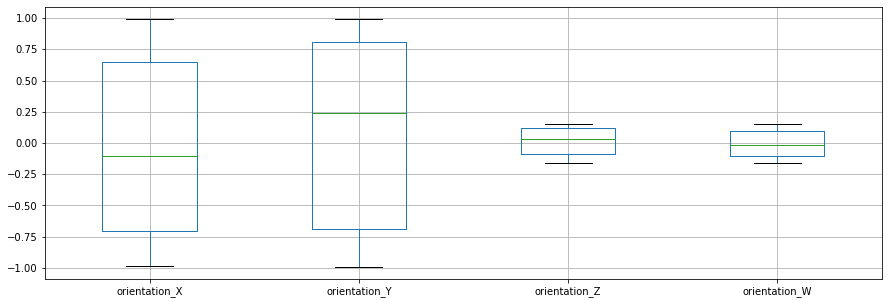

<Figure size 432x288 with 0 Axes>

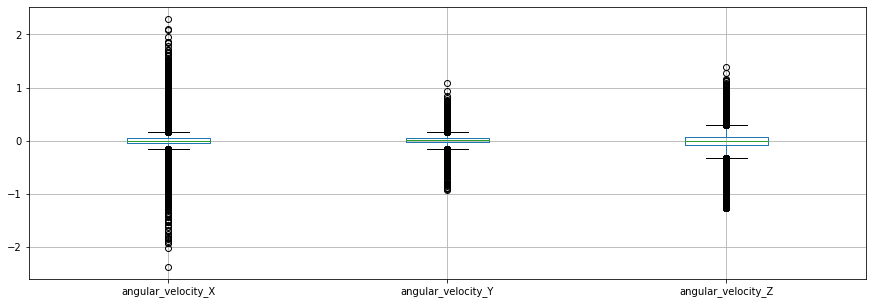

<Figure size 432x288 with 0 Axes>

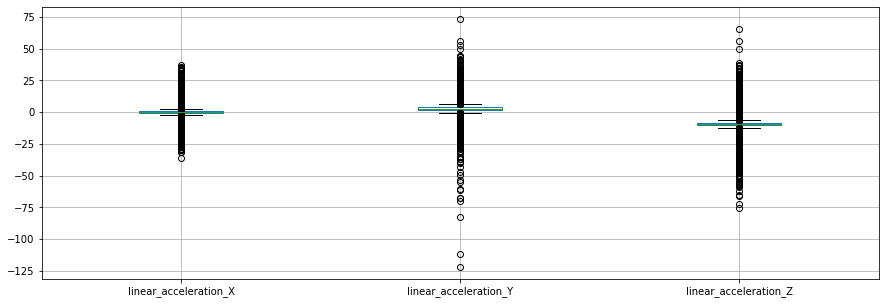

In [8]:
plot.figure(figsize=(15,5))
x_train.iloc[:,3:7].boxplot()
plot.figure()
plot.figure(figsize=(15,5))
x_train.iloc[:,7:10].boxplot()
plot.figure()
plot.figure(figsize=(15,5))
x_train.iloc[:,10:13].boxplot()

Barplot to see to if their are any outliers are present in the data .From the above plot we can see that linear acceleration,angular_velocity feature has some outliers.

#### 3.Merge data

In [8]:
train_data = pd.merge(x_train, y_train, how = 'outer', left_on = 'series_id', right_on = 'series_id')

info()  used to see if their are any null value in the dataset or not.

#### 4.Plotting heatmap for correlation

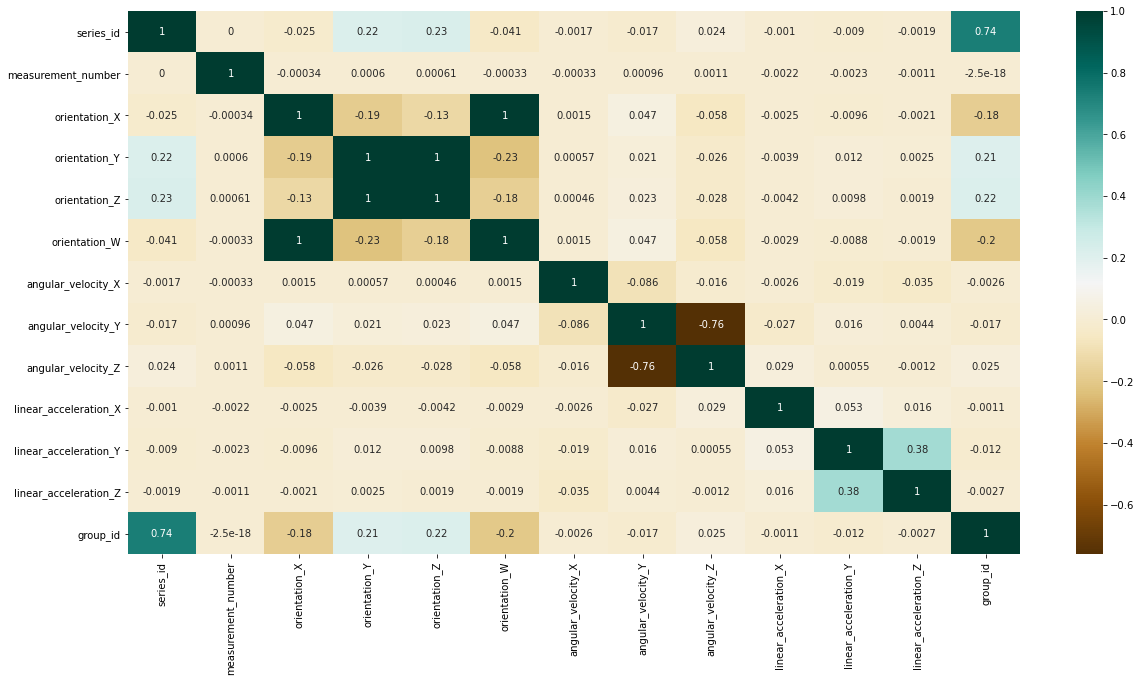

In [11]:
plot.figure(figsize=(20,10))
sns.heatmap(train_data.corr(),annot = True,cmap='BrBG')

From the above heatmap we can say that Oreintation_X and Orientation_W and Orientaion_Z and Orientation_Y are highly correlated so we need to use any one of the two since it will make model learn fast.

In [12]:
vars_1=['orientation_X','orientation_Y','orientation_Z','orientation_W','angular_velocity_X','angular_velocity_Y','angular_velocity_Z','linear_acceleration_X','linear_acceleration_Y','linear_acceleration_Z']

In [13]:
surfaces=list(np.unique(train_data['surface']))

####  6.Distplot to see distribution of data 

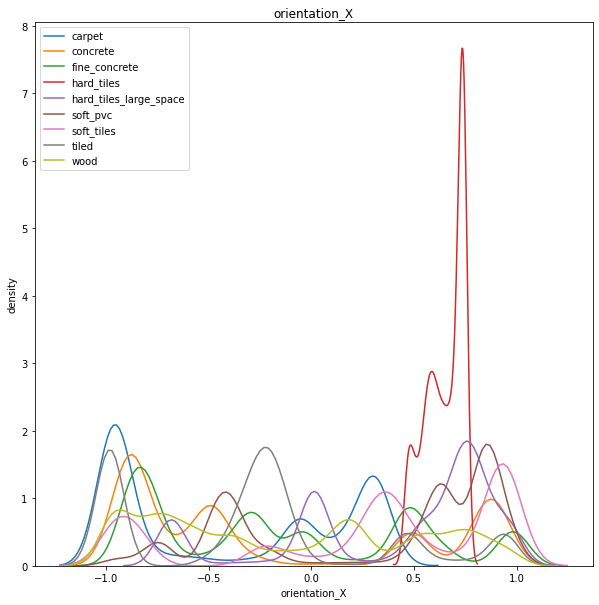

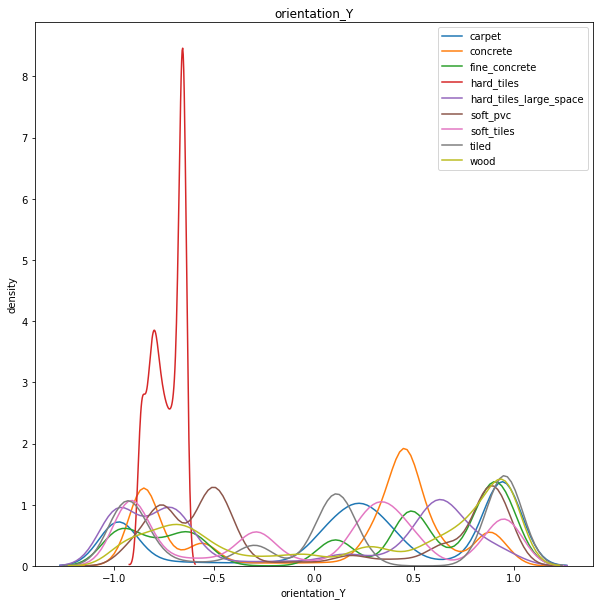

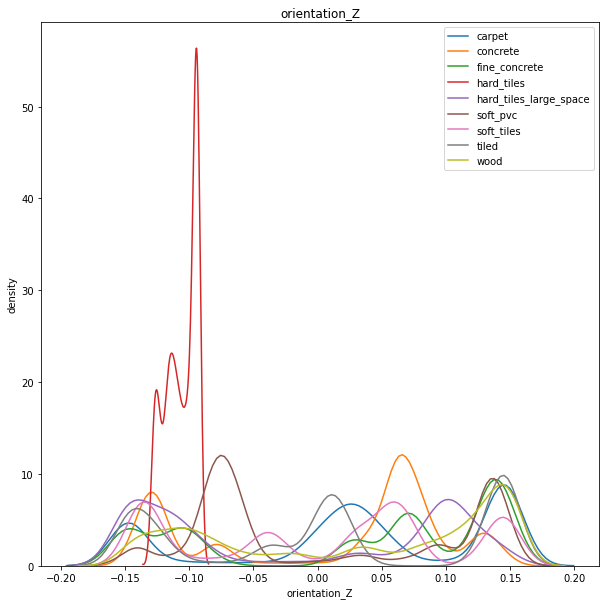

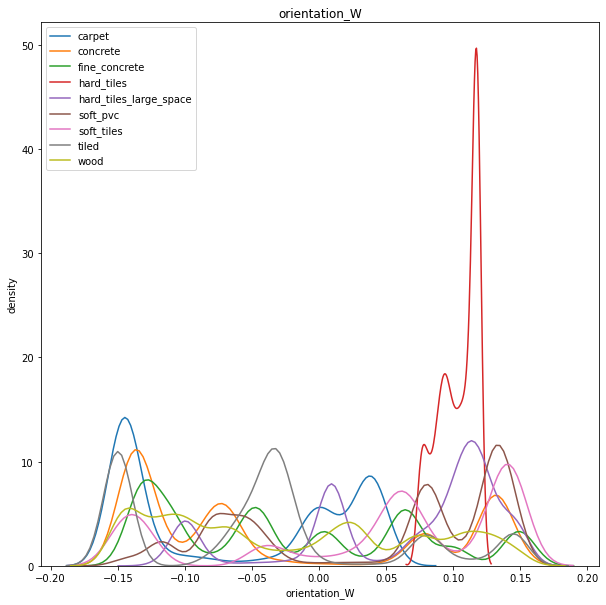

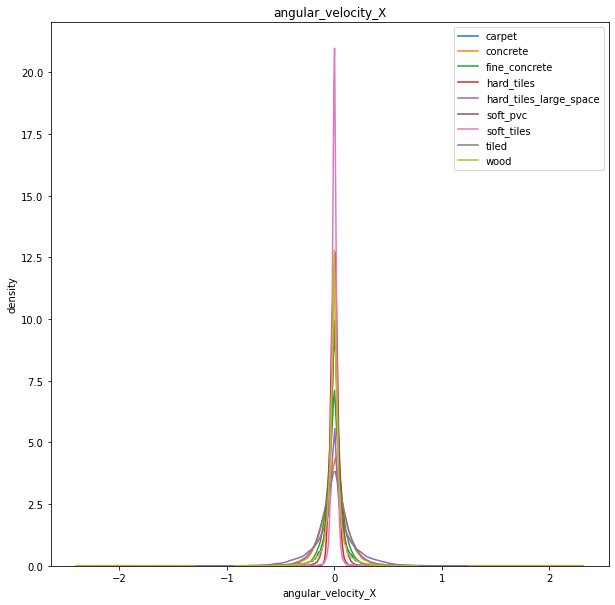

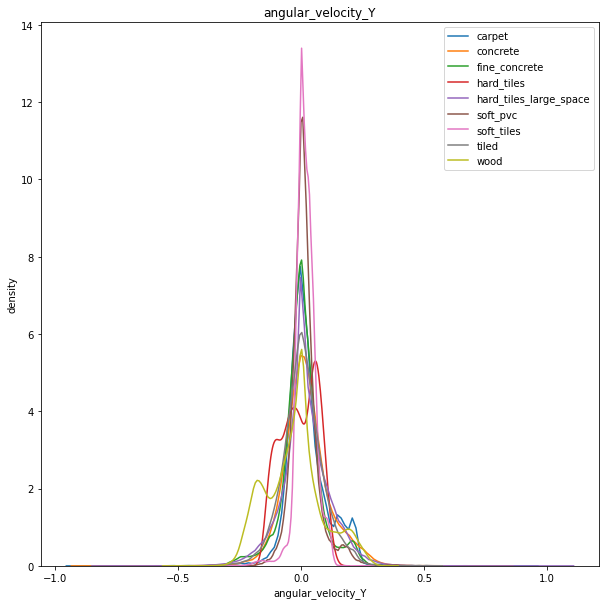

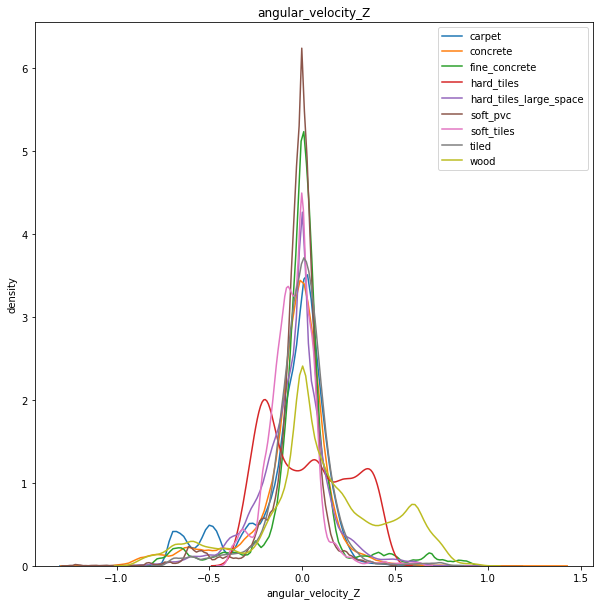

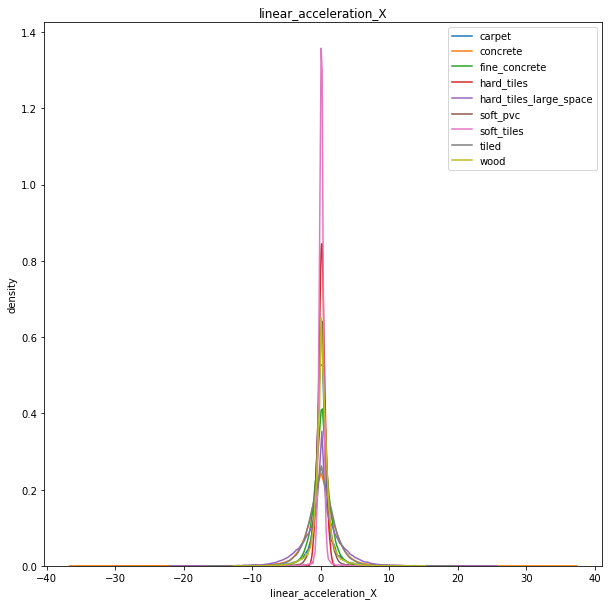

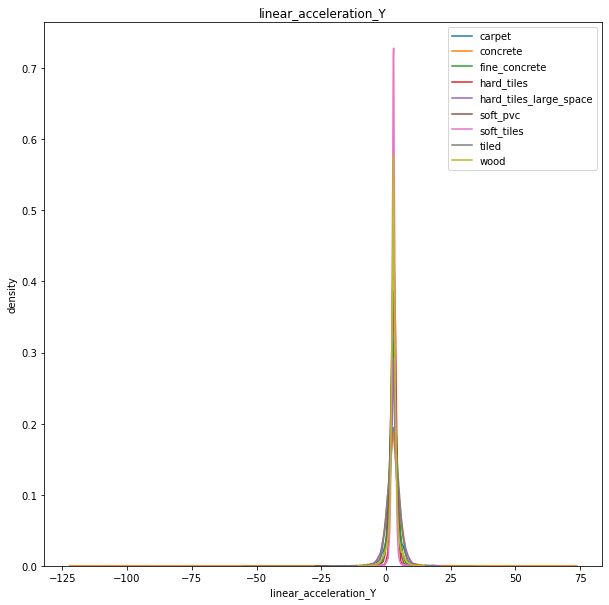

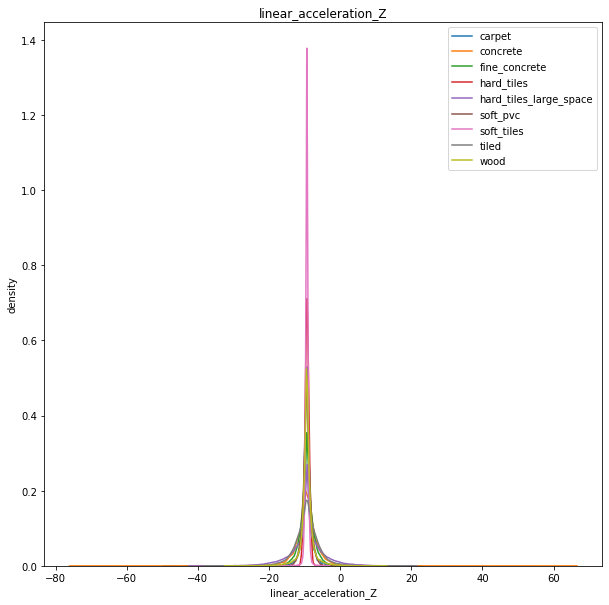

In [14]:
for surface in surfaces:
    for i in vars_1:
        plot.figure(i,figsize=(10,10))
        plot.title(i)
        t=train_data.loc[train_data.surface==surface]
        sns.distplot(t[i], 
                     hist = False,label=surface)
        plot.ylabel('density')
        plot.legend()

From the above distribution plots it is unclear that how these features will be useful in classification since the data distribution is not diffrent for linear_acceleration and angilar_velocity so.

And since from heatmap we know that orientation features strongly correlate then we will use only one from each.

#### 7.Plotting the features

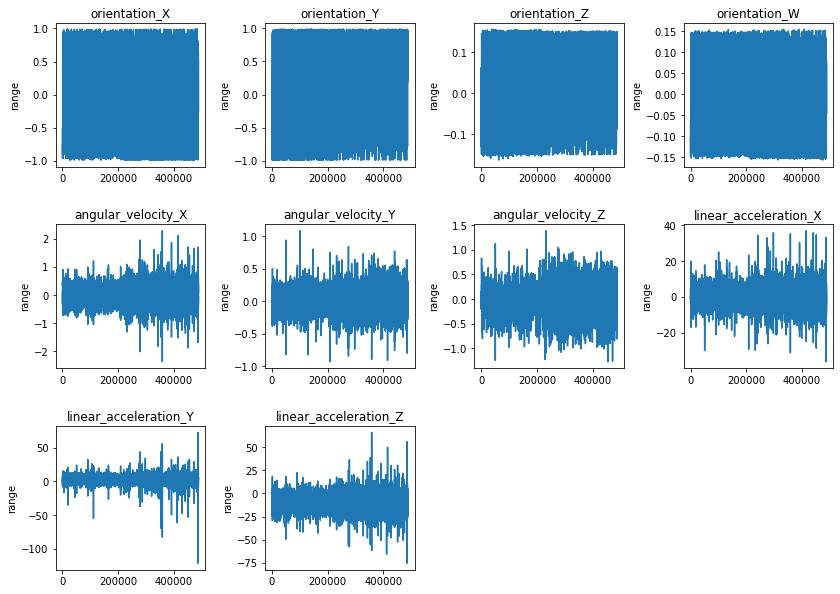

In [15]:
for i,feature in enumerate(vars_1):
        ax = plot.subplot(4,4,i+1)
        ax.plot(train_data[feature])
        ax.set_title(feature)
        plot.subplots_adjust(left=0.1,
                    bottom=0.3, 
                    right=1.9, 
                    top=2.9, 
                    wspace=0.4, 
                    hspace=0.4)
        plot.ylabel('range')

From the above plots in the orientation plot the points are all over the place so in classification it may not provide much help whereas the rest of the features tend to show some diffrent pattern.

#### 8.Visualizing data with feature transformation:

In [142]:
import matplotlib.gridspec as gridspec

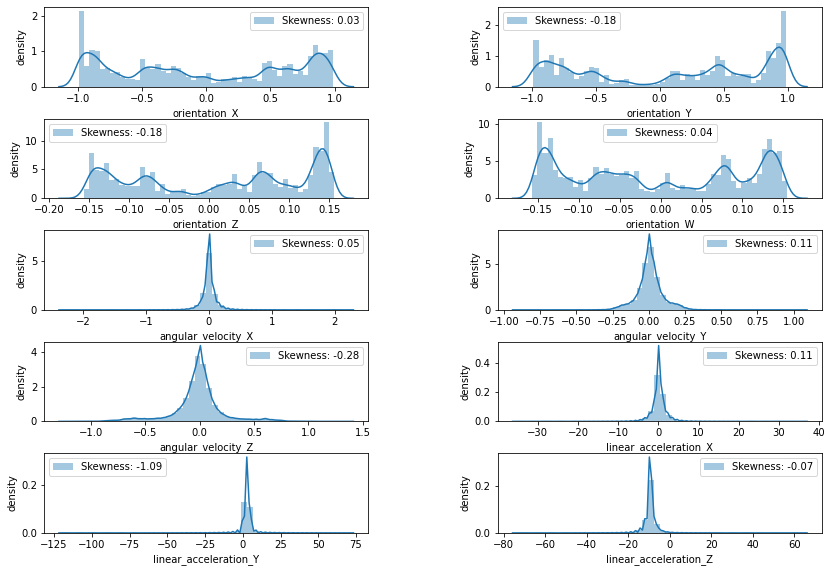

In [77]:
gs = gridspec.GridSpec(7, 2)
for i,var in enumerate(vars_1):
    ax = plot.subplot(gs[i])
    sns.distplot(train_data[var],label="Skewness: %.2f"%(train_data[var].skew()))
    plot.subplots_adjust(left=0.1,
            bottom=0.3, 
            right=1.9, 
            top=2.9, 
            wspace=0.4, 
            hspace=0.4)
    ax.legend()
    plot.ylabel('density')

from the above plot we checked for skewness and the features tend to show near about normal distribution.

In [199]:
train_log_data=x_train.copy()

In [200]:

train_log_data=train_log_data.drop(['row_id', 'series_id', 'measurement_number'],axis=1)

In [202]:
for feat in vars_1:
    train_log_data[feat]=train_log_data[feat].apply(lambda x: np.log1p(abs(x)+0.0001))

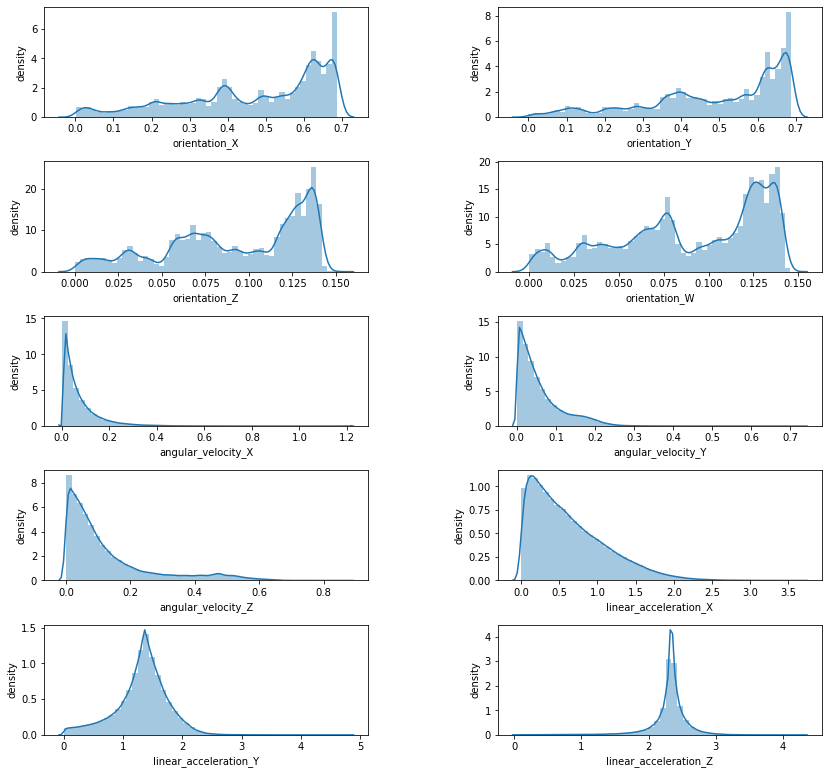

In [203]:
gs = gridspec.GridSpec(7, 2)

for i,feat in enumerate(vars_1):
    ax = plot.subplot(gs[i])
#     plot.title(feat)
    sns.distplot(train_log_data[feat])
    plot.ylabel('density')
    plot.subplots_adjust(left=0.1,
        bottom=0.3, 
        right=1.9, 
        top=3.9, 
        wspace=0.4, 
        hspace=0.4)

feature transformation of the datframe featueres by logn1p and plotted the distplot of the features but for classification point of view nothing much we can interpret from the plots.


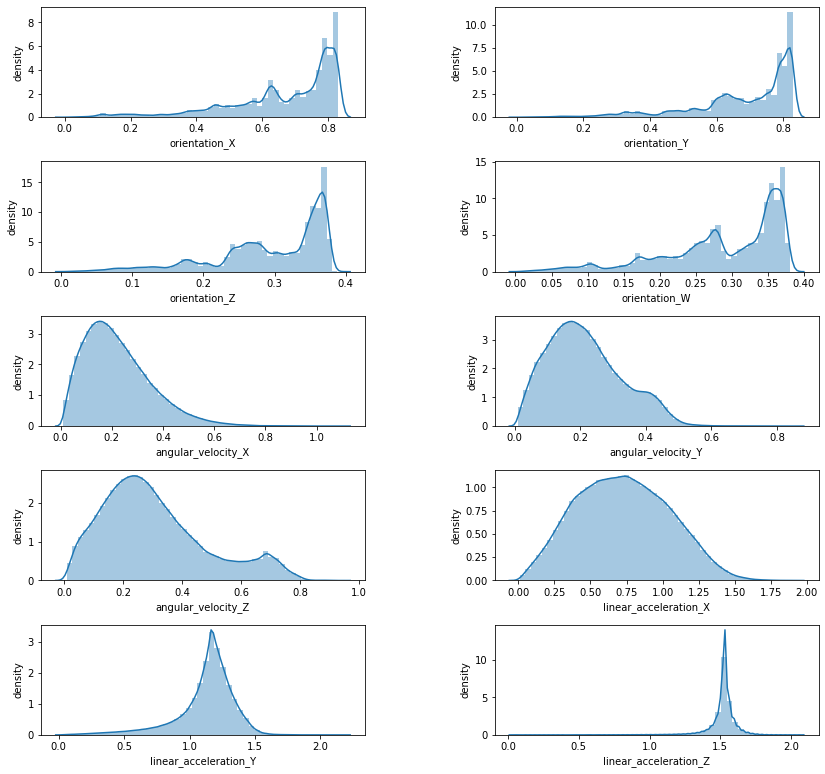

In [204]:
for i,feat in enumerate(vars_1):
    ax = plot.subplot(gs[i])
#     plot.title(feat)
    sns.distplot(np.sqrt(train_log_data[feat]))
    plot.ylabel('density')
    plot.subplots_adjust(left=0.1,
        bottom=0.3, 
        right=1.9, 
        top=3.9, 
        wspace=0.4, 
        hspace=0.4)

feature transformation of the datframe featueres by squareroot and plotted the distplot of the features but for classification point of view nothing much we can interpret from the plots.

In [205]:
vars_1_2=['orientation_X',
 'orientation_Y',
 'orientation_Z',
 'orientation_W',
 'angular_velocity_X',
 'angular_velocity_Y',
 'angular_velocity_Z',
 'linear_acceleration_X',
 'linear_acceleration_Y',
 'linear_acceleration_Z','surface']

<Figure size 432x288 with 0 Axes>

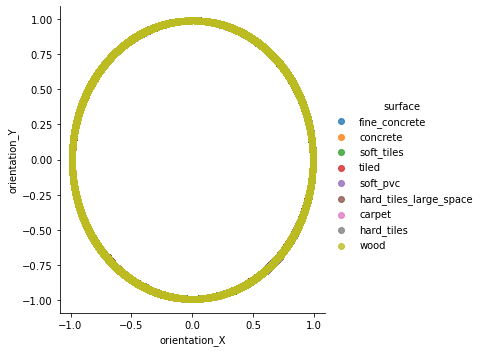

<Figure size 432x288 with 0 Axes>

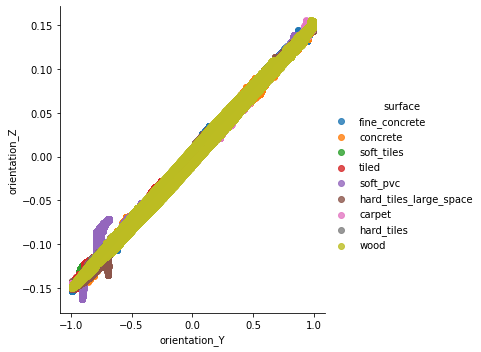

<Figure size 432x288 with 0 Axes>

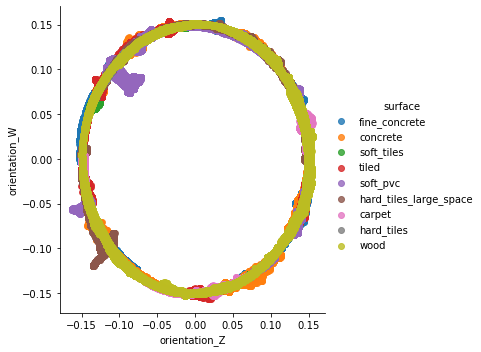

<Figure size 432x288 with 0 Axes>

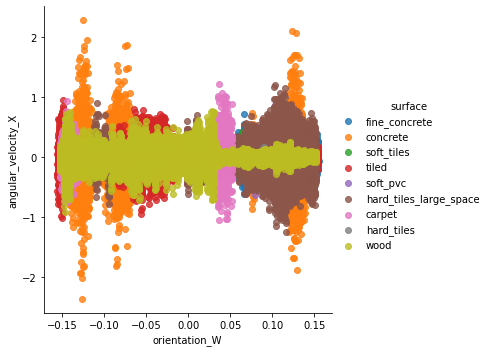

<Figure size 432x288 with 0 Axes>

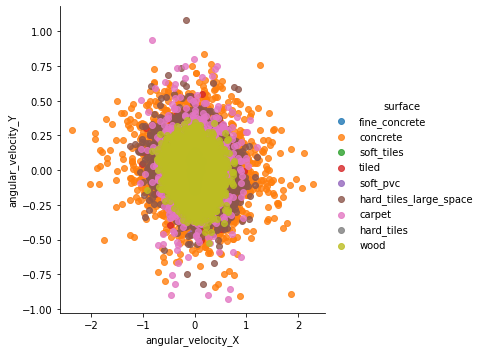

<Figure size 432x288 with 0 Axes>

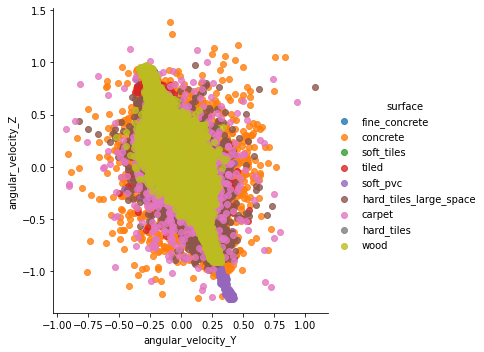

<Figure size 432x288 with 0 Axes>

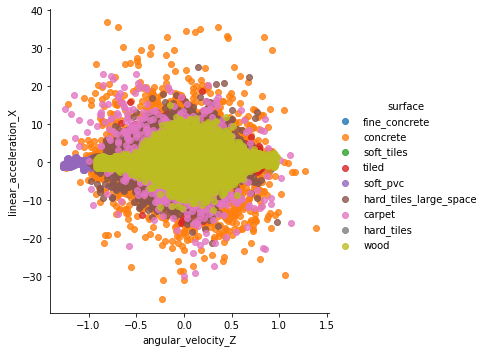

<Figure size 432x288 with 0 Axes>

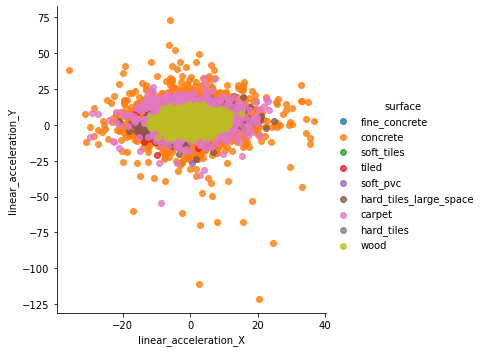

<Figure size 432x288 with 0 Axes>

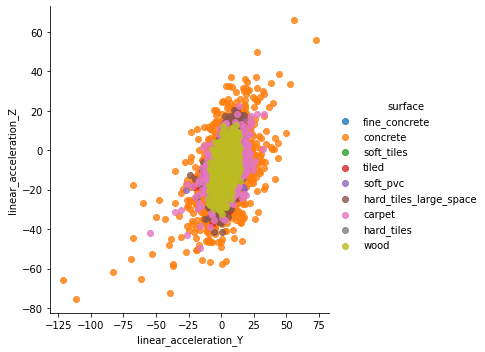

In [206]:
for i in range(len(vars_1)-1):
    plot.figure()
    sns.lmplot(vars_1[i], vars_1[i+1], train_data, hue="surface", fit_reg=False)
#     plot.subplots_adjust(left=0.1,
#         bottom=0.3, 
#         right=1.9, 
#         top=3.9, 
#         wspace=0.4, 
#         hspace=0.4)

from this plot also we can say orientation doesnt help much in classification like others.

Text(0, 0.5, 'range of values')

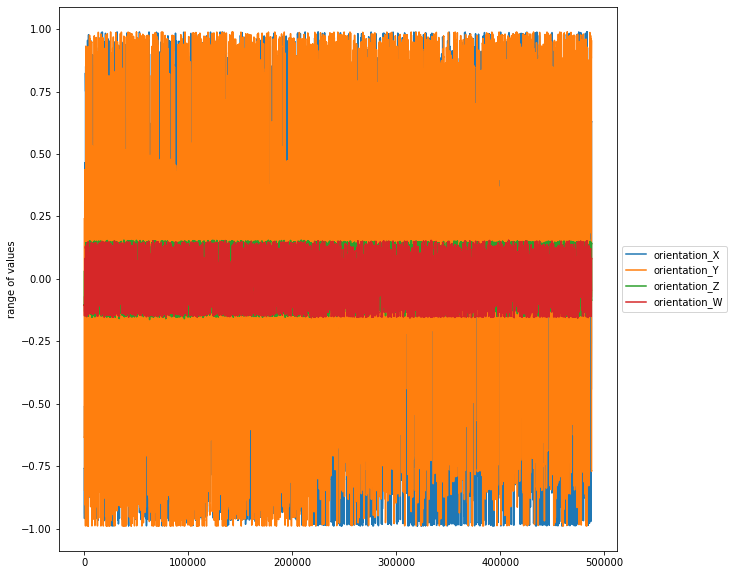

In [207]:
ax = train_data[['orientation_X',
 'orientation_Y',
 'orientation_Z',
 'orientation_W',
]].plot(figsize=(10,10))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plot.ylabel('range of values')


From the above plots in the orientation plot the points are all over the place so in classification it may not provide much help.

Text(0, 0.5, 'range of values')

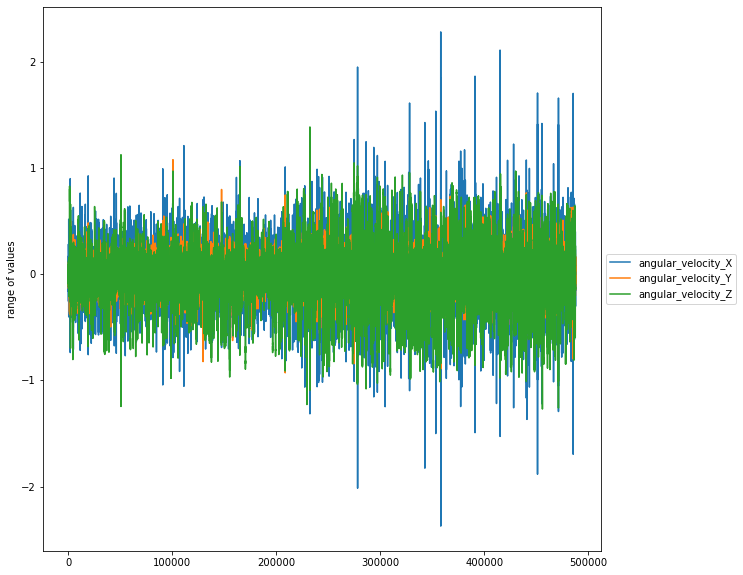

In [208]:
ax = train_data[['angular_velocity_X',
 'angular_velocity_Y',
 'angular_velocity_Z',
]].plot(figsize=(10,10))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plot.ylabel('range of values')


it depicts the points better than oreintaion features.

Text(0, 0.5, 'range of values')

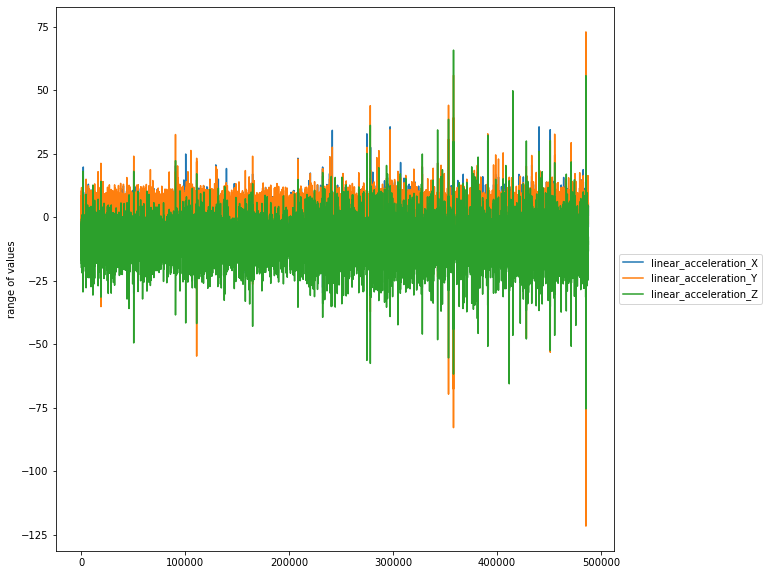

In [209]:
ax = train_data[[ 'linear_acceleration_X',
 'linear_acceleration_Y',
 'linear_acceleration_Z'
]].plot(figsize=(10,10))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plot.ylabel('range of values')


it depicts the points better than oreintaion features.

### Conclusion from the eda:

From the above eda we can conclude one thing that orientation features may or may not help much in classification so we can use any one of them since few are correlated to each other so we can use one and drop others while rest of the feautures were able to show different patterns. 

## Data Preprocessing:

#### checking null values:

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 487680 entries, 0 to 487679
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   row_id                 487680 non-null  object 
 1   series_id              487680 non-null  int64  
 2   measurement_number     487680 non-null  int64  
 3   orientation_X          487680 non-null  float64
 4   orientation_Y          487680 non-null  float64
 5   orientation_Z          487680 non-null  float64
 6   orientation_W          487680 non-null  float64
 7   angular_velocity_X     487680 non-null  float64
 8   angular_velocity_Y     487680 non-null  float64
 9   angular_velocity_Z     487680 non-null  float64
 10  linear_acceleration_X  487680 non-null  float64
 11  linear_acceleration_Y  487680 non-null  float64
 12  linear_acceleration_Z  487680 non-null  float64
 13  group_id               487680 non-null  int64  
 14  surface                487680 non-nu

from the above cell we can see that their are no null values.

#### Denoising the data:

In [7]:
# following code snippets were taken from https://www.kaggle.com/theoviel/fast-fourier-transform-denoising
def filter_signal(signal, threshold=1e3):
    fourier = rfft(signal)
    frequencies = rfftfreq(signal.size, d=20e-3/signal.size)
    fourier[frequencies > threshold] = 0
    return irfft(fourier)

In the above function the numpy's fft library(fourier tranform) was used and then frequncies were computed and then the inverse fourier transform was applied.

In [8]:
# denoise train and test angular_velocity and linear_acceleration data
X_train_denoised = x_train.copy()
X_test_denoised = x_test.copy()

In [9]:
#following code snippets were taken from https://www.kaggle.com/ilhamfp31/fast-fourier-transform-denoising
from numpy.fft import *

# train
for col in x_train.columns:
    if col[0:3] == 'ang' or col[0:3] == 'lin':
        # Apply filter_signal function to the data in each series
        denoised_data = x_train.groupby(['series_id'])[col].apply(lambda x: filter_signal(x))
        # Assign the denoised data back to X_train

        list_denoised_data = []
        for arr in denoised_data:
            for val in arr:
                list_denoised_data.append(val)
        X_train_denoised[col] = list_denoised_data
        

applied the denoising function filter_signal to the data features angular_velocity and linear acceleration grouping it by series_id and then appendinng the denoised data to a new dataframe X_train_denoised for train set. 

In [10]:
# test
for col in x_test.columns:
    if col[0:3] == 'ang' or col[0:3] == 'lin':
        # Apply filter_signal function to the data in each series
        denoised_data = x_test.groupby(['series_id'])[col].apply(lambda x: filter_signal(x))
        
        # Assign the denoised data back to X_train
        list_denoised_data = []
        for arr in denoised_data:
            for val in arr:
                list_denoised_data.append(val)
        X_test_denoised[col] = list_denoised_data

same function filter_signal was applied on test_set giving  new dataframe X_test_denoised

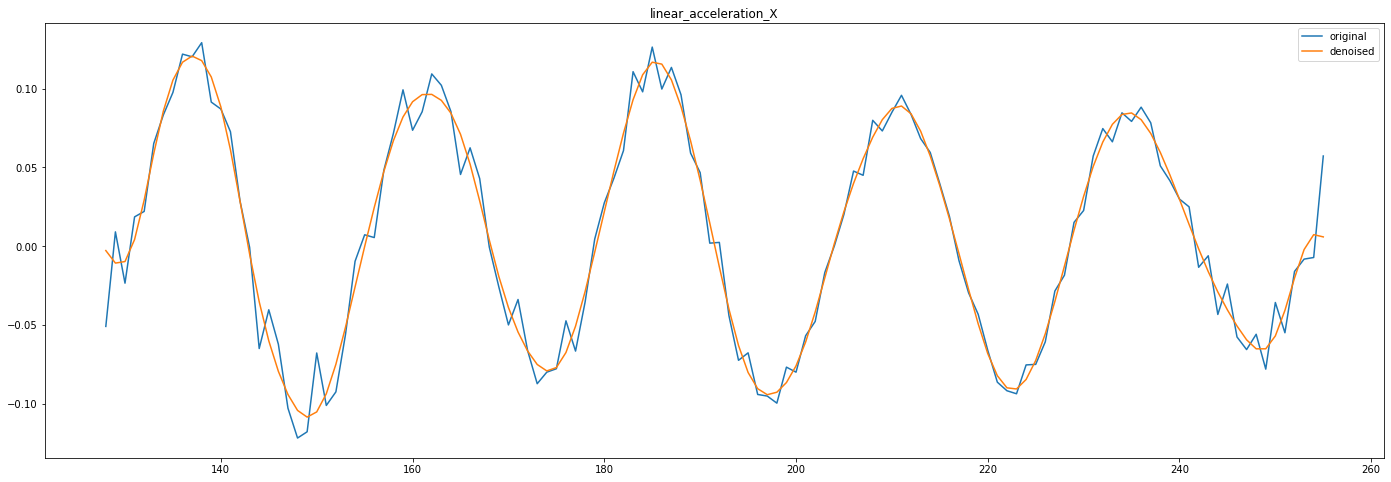

In [11]:
plot.figure(figsize=(24, 8))
plot.title('linear_acceleration_X')
plot.plot(x_train.angular_velocity_Z[128:256], label="original");
plot.plot(X_train_denoised.angular_velocity_Z[128:256], label="denoised");
plot.legend()
plot.show()

the above plot depicts that after denoising the features we got a smooth plot representing the noise removal.

# Feature Engineering:

In [12]:
from pandas import concat

In [13]:
def new_features(dataset):
    dataset['resultant_orientation']=np.sqrt((dataset['orientation_X'])**2+(dataset['orientation_Y'])**2+(dataset['orientation_Z'])**2+(dataset['orientation_W'])**2)
    dataset['resultant_angular_velocity']=np.sqrt((dataset['angular_velocity_X'])**2+(dataset['angular_velocity_Y'])**2+(dataset['angular_velocity_Z'])**2)
    dataset['resultant_linear_acceleration']=np.sqrt((dataset['linear_acceleration_X'])**2+(dataset['linear_acceleration_Y'])**2+(dataset['linear_acceleration_Z'])**2)
    
    dataset['resultant_orientation_sum']=np.sqrt(((dataset['orientation_X'])**2+(dataset['orientation_Y'])**2+(dataset['orientation_Z'])**2+(dataset['orientation_W'])**2))/(dataset['orientation_X']+dataset['orientation_Y']+dataset['orientation_Z']+dataset['orientation_W'])
    dataset['resultant_angular_velocity_sum']=np.sqrt(((dataset['angular_velocity_X'])**2+(dataset['angular_velocity_Y'])**2+(dataset['angular_velocity_Z'])**2))/(dataset['angular_velocity_X']+dataset['angular_velocity_Y']+dataset['angular_velocity_Z'])
    dataset['resultant_linear_acceleration_sum']=np.sqrt(((dataset['linear_acceleration_X'])**2+(dataset['linear_acceleration_Y'])**2+(dataset['linear_acceleration_Z'])**2))/(dataset['linear_acceleration_X']+dataset['linear_acceleration_Y']+dataset['linear_acceleration_Z'])
    
    return dataset

In [14]:
X_train_denoised=new_features(X_train_denoised)
X_test_denoised=new_features(X_test_denoised)

In the above cell we calculated the resultant of each sensor feature by square rooting the sum of the square of the feaures coordinates.

In [15]:
def compute_statistical_features(X_data):
    #Drop unwanted features
#     output_X_data = X_data.drop(['surface','row_id','measurement_number','group_id'],axis=1)

    #Group by series 
    output_stat_series=pd.DataFrame()

    for col in X_data.columns:
        if col not in ['series_id', 'measurement_number','row_id']:
            output_stat_series[col+'_mean']=X_data.groupby('series_id')[col].mean()
            output_stat_series[col+'_median']=X_data.groupby('series_id')[col].median()
            output_stat_series[col+'_max']=X_data.groupby('series_id')[col].max()
            output_stat_series[col+'_min']=X_data.groupby('series_id')[col].min()
            output_stat_series[col+'_var']= X_data.groupby('series_id')[col].var()
            output_stat_series[col+'_std']= X_data.groupby('series_id')[col].std()
            output_stat_series[col+'_quant'] = X_data.groupby('series_id')[col].quantile()
            output_stat_series[col+'_skew']= X_data.groupby('series_id')[col].skew()
            output_stat_series[col + '_mad'] = X_data.groupby(['series_id'])[col].apply(lambda x: np.median(np.abs(np.diff(x))))
            output_stat_series[col + '_abs_max'] = X_data.groupby('series_id')[col].apply(lambda x: np.max(np.abs(x)))
            output_stat_series[col + '_abs_min'] = X_data.groupby('series_id')[col].apply(lambda x: np.min(np.abs(x)))
    series_ids = np.unique(X_data['series_id'])
    
    return output_stat_series,series_ids #x_data_final,

In [16]:
X_train_denoised,series_ids_train=compute_statistical_features(X_train_denoised)
X_test_denoised,series_ids_test=compute_statistical_features(X_test_denoised)

In the above cell we used aggregate functions mean,var,std on the features orintaiton,angular velocity and linear acceleration.

above cell is the denoised data with original ,statistical and manually computed features.

#### Performance metrics:

We can use Accuracy, micro-f1 score as a performance metric since we know that the dataset is bit imbalanced and micro-f1 score is prefferd to deal better with imbalanced data.

## Model Selection

In [17]:
y_train=pd.read_csv('y_train.csv')

In [18]:
y_surface=y_train['surface']

####  I trianed the data on 4 diiferent classifier KNN,XGBoost,LGBM,Gradient Boost.

### KNN :

In [19]:
from sklearn.metrics import f1_score
import joblib

In [123]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(X_train_denoised, y_surface)

KNeighborsClassifier(n_neighbors=2)

In [124]:
neigh.score(X_train_denoised, y_surface)

0.6690288713910761

In [125]:
pred_test=neigh.predict(X_test_denoised)
pred_train=neigh.predict(X_train_denoised)

In [126]:
f1_score(pred_train, y_surface, average='micro')

0.6690288713910761

After using Knn we got accuracy score of 0.669 and f1-score of 0.66

### XGBoost Classifier:

In [20]:
import xgboost as xgb
my_model = xgb.XGBClassifier()
my_model.fit(X_train_denoised, y_surface)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [21]:
my_model.score(X_train_denoised, y_surface)

1.0

In [22]:
# Predicting the Test set results
y_pred_test = my_model.predict(X_test_denoised)
y_pred_train= my_model.predict(X_train_denoised)

In [23]:
y_pred_test

array(['hard_tiles_large_space', 'carpet', 'tiled', ..., 'concrete',
       'concrete', 'wood'], dtype=object)

In [24]:
df=pd.DataFrame()
df['series_id']=series_ids_test
df['surface']=y_pred_test

In [25]:
df.to_csv('xgboost_classifier.csv',index=False)

In [131]:
f1_score(y_surface, y_pred_train, average='micro')

1.0

After using XGboost we got accuracy score of 1 and f1-score of 1 which is conssidered perfect.

### LGBM Classifier:

In [22]:
import lightgbm as lgb
clf = lgb.LGBMClassifier(n_estimators=100,learning_rate=0.01,max_depth=-1,objective='multiclass')
clf.fit(X_train_denoised, y_surface)

LGBMClassifier(learning_rate=0.01, objective='multiclass')

In [23]:
joblib_file = "lgbm_model_new.pkl"   
joblib.dump(clf, joblib_file)

['lgbm_model_new.pkl']

In [139]:
y_pred_train_lgbm = clf.predict(X_train_denoised)
y_pred_test_lgbm = clf.predict(X_test_denoised)

In [141]:
f1_score(pred_train_lgbm, y_surface, average='micro')

0.978740157480315

In [142]:
clf.score(X_train_denoised, y_surface)

0.978740157480315

In [143]:
df=pd.DataFrame()
df['series_id']=series_ids_test
df['surface']=y_pred_test_lgbm

In [144]:
df

,series_id,surface
0,0,hard_tiles_large_space
1,1,carpet
2,2,tiled
3,3,soft_tiles
4,4,soft_pvc
...,...,...
3811,3811,soft_pvc
3812,3812,carpet
3813,3813,concrete
3814,3814,concrete


In [148]:
df.to_csv('lgbm_kaggle.csv',index=False)

After using LGBM we got accuracy score of 0.978 and f1-score of 0.97 which is conssidered perfect.

### Conclusion:
    After training the data on KNN,XGboost and LGBM we can say that LGBM gave better and faster result than 
    the other two.

#### Kaggle score of the predicted surfaces using LGBM Classifier

In [2]:
!ls


 CareerCon_Navigate_robots_final.ipynb
 custom_classifier.csv
'Editing Robot Surface Detection_Help Navigate Robots – Medium.pdf'
 Final_Pipeline.ipynb
 Hybrid_Classified.csv
 index.html
 lgbm_custom_classiifier.png
 lgbm_kaggle.csv
 lgbm_kaggle_down.csv
 Lgbm_Kaggle_score_copped.png
 Lgbm_Kaggle_score.png
 lgbm_model_new.pkl
 lgbm_model.pkl
 lgbm_model.sav
 rs_surface_submission6.csv
 sample_submission.csv
 screen-capture.mp4
 screen-capture.webm
'Screenshot from 2021-08-20 18-17-01.png'
'Screenshot from 2021-08-23 14-44-59.png'
'Screenshot from 2021-08-23 15-41-42.png'
'Screenshot from 2021-08-23 15-43-58.png'
'Screenshot from 2021-08-23 15-45-54 (1).png'
'Screenshot from 2021-08-23 15-45-54.png'
'Screenshot from 2021-08-23 15-49-45.png'
 Self_case_study_1_EDA_DP_FE_Model_Completed_Final-Copy1.ipynb
 Self_case_study_1_EDA_DP_FE_Model_Completed_Final.ipynb
'Self_case_study_1_EDA_DP_FE_Model_Completed_Final - Jupyter Notebook.pdf'
 Self_case_study_1_Final_notebook.ipynb
'Self_case_stud

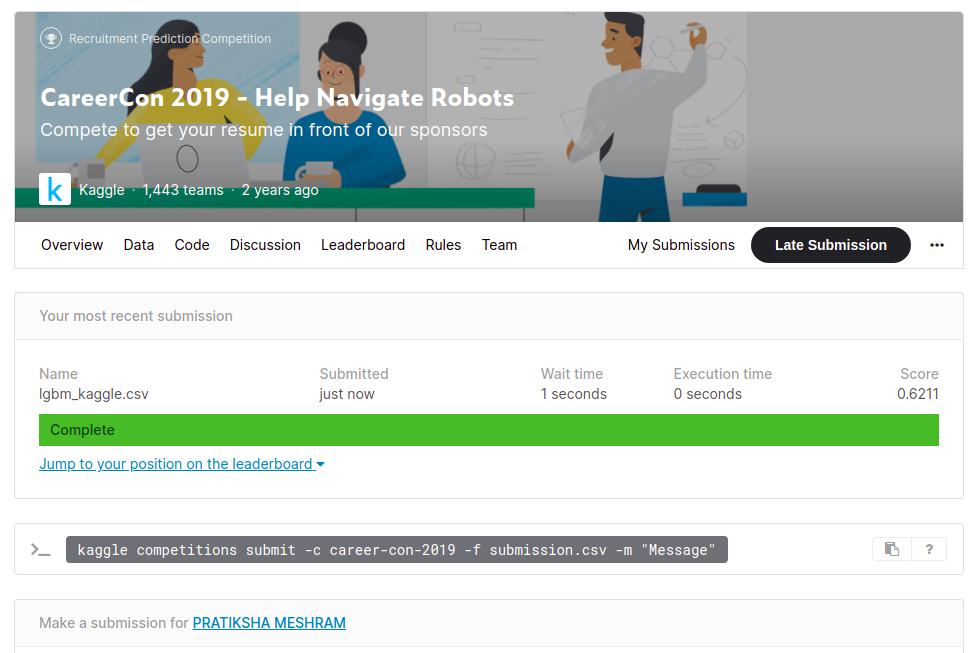

In [149]:
from IPython.display import Image 

Image("Lgbm_Kaggle_score.png")

In [1]:
from prettytable import PrettyTable
  
# Specify the Column Names while initializing the Table
myTable = PrettyTable(["Classifier ", "Accuracy(of training data)","f1_score(of training data)"])
  
# Add rows
myTable.add_row(["KNN", "0.669","0.669"])
myTable.add_row(["XG-Boost", "1","1"])
myTable.add_row(["LGBM", "0.978","0.978"])

  
print(myTable)

+-------------+----------------------------+----------------------------+
| Classifier  | Accuracy(of training data) | f1_score(of training data) |
+-------------+----------------------------+----------------------------+
|     KNN     |           0.669            |           0.669            |
|   XG-Boost  |             1              |             1              |
|     LGBM    |           0.978            |           0.978            |
+-------------+----------------------------+----------------------------+
